**Scenario:** Assuming I am a developer of an anime streaming platform, I would pay attention to a few metrics to increase website traffic. The primary metric could be about view analysis. Additionally, it's possible to analyze some other related characteristics.

<b> Objectives: </b>
1. View analysis: understand view distribution and view sources.
2. Trend analysis: identify the current anime trend (genre, studio, director,...).
3. Voting distribution (As voting from this anime streaming platform is extremely high).
4. Duration distribution of anime in different type.
4. Exploring other categorical data.
5. Exploring the number of anime through years.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import statistics
import numpy as np

In [24]:
data = pd.read_csv('anime_cleaned.csv')

In [25]:
data.head()

,name,description,voting,duration,view,status,genre,director,country,follower,quality,rating,studio,season,year,type
0,Dark Gathering,"Keitarou, chàng trai có khả năng thu hút ma qu...",0.95,25 tập,36088,Phim đang chiếu,"['Shounen', 'Supernatural', 'Horror']",Hiroshi Ikehata,Nhật Bản,34,HD,R - 17+ (bạo lực và tục tĩu),OLM,Mùa Hạ,2023.0,Anime bộ
1,Trò Chơi Nói Dối,"Đảo học viện, nơi các học sinh mở ra những trậ...",0.94,12 tập,173964,Phim đang chiếu,"['Sci-Fi', 'School', 'Romance', 'Psychological...",Oono Satoru,Nhật Bản,222,HD,PG-13 - Teens 13 tuổi trở lên,GEEK TOYS,Mùa Hạ,2023.0,Anime bộ
2,Horimiya: Piece,Chuyển thể những phần ở manga bị cắt trong TV ...,0.91,13 tập,584019,Phim đang chiếu,"['Shounen', 'School', 'Romance', 'Slice of Lif...",Ishihama Masashi,Nhật Bản,497,HD,PG-13 - Teens 13 tuổi trở lên,CloverWorks,Mùa Hạ,2023.0,Anime bộ
3,Temple,Đúng vậy. Tôi sẽ trở thành một nhà sư! Không b...,0.97,12 tập,86385,Phim đang chiếu,"['Romance', 'Slice of Life', 'Harem', 'Ecchi',...",Koga Kazuomi,Nhật Bản,139,HD,PG-13 - Teens 13 tuổi trở lên,Gekkou,Mùa Hạ,2023.0,Anime bộ
4,Tôi Có Thực Sự Là Người Mạnh Nhất Không?,Một thanh niên bị bắt nạt được tái sinh ở thế ...,0.89,12 tập,555460,Phim đang chiếu,"['Shounen', 'Romance', 'Fantasy', 'Comedy', 'A...",Naoya Takashi,Nhật Bản,643,HD,PG-13 - Teens 13 tuổi trở lên,Staple Entertainment,Mùa Hạ,2023.0,Anime bộ


In [26]:
data = data.drop('description', axis=1)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      4860 non-null   object 
 1   voting    4860 non-null   float64
 2   duration  4860 non-null   object 
 3   view      4860 non-null   int64  
 4   status    4860 non-null   object 
 5   genre     4860 non-null   object 
 6   director  4860 non-null   object 
 7   country   4860 non-null   object 
 8   follower  4860 non-null   int64  
 9   quality   4860 non-null   object 
 10  rating    4860 non-null   object 
 11  studio    4860 non-null   object 
 12  season    4554 non-null   object 
 13  year      4550 non-null   float64
 14  type      4860 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 569.7+ KB


In [28]:
data.isnull().sum()*100/len(data)

name        0.000000
voting      0.000000
duration    0.000000
view        0.000000
status      0.000000
              ...   
rating      0.000000
studio      0.000000
season      6.296296
year        6.378601
type        0.000000
Length: 15, dtype: float64

Since the null values account for only 6% of the total data, they can be removed.

In [29]:
data = data.dropna(subset=['year', 'season'])

In [30]:
data['year'] = data['year'].astype(int)

# Necessary functions

**Show summary statistics of numerical feature**

In [31]:
def show_summary(feature):
    print(f'Mean: ', statistics.mean(feature),
          f'\nMedian: ', statistics.median(feature),
          f'\nMode: ', statistics.mode(feature),
          f'\nStandard deviation: ', statistics.stdev(feature),
          f'\nQuartile range: Q1:', np.percentile(feature, 25), f'   Q2:', np.percentile(feature, 50),f'   Q3:', np.percentile(feature, 75))

**Show outliers' bound using IQR**

In [32]:
def show_outliers(feature):
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)

    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return [lower_bound, upper_bound]

**Show top 10 bar plot**

In [33]:
def show_top10_barplot(feature, xlabel, ylabel):
    sns.barplot(x=feature.values, y=feature.index, orient='h')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Top 10 ' + ylabel + ' by ' + xlabel)

    for i, value in enumerate(feature.values):
        plt.annotate(f'{value:.0f}', (value, i), ha='left', va='center')

    plt.show()

**Show bar plot**

In [51]:
def show_barplot(feature):
    feature_count = feature.value_counts()

    sns.barplot(x=feature_count.index, y=feature_count.values)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    for i, value in enumerate(feature_count.values):
        plt.annotate(value, (i, value), ha='center', va='bottom')

    plt.show()

**Change genre type**

In [12]:
type(data['genre'][0])

str

Genre values should be list, not string. Therefore, i'll make some changes to convert them into the appropriate data type.

In [13]:
for index, row in data.iterrows():
    temp = data['genre'][index].replace('[','').replace(']','').replace('\'','').split(',')
    #print(temp)
    for i in range(len(temp)):
        temp[i] = temp[i].strip()
        #print(temp[i])

    data['genre'][index] = temp

<ipython-input-13-47bd43b4ec5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'][index] = temp


In [14]:
type(data['genre'][0])

list

In [15]:
data['genre']

0                         [Shounen, Supernatural, Horror]
1       [Sci-Fi, School, Romance, Psychological, Game,...
2       [Shounen, School, Romance, Slice of Life, Comedy]
3          [Romance, Slice of Life, Harem, Ecchi, Comedy]
4          [Shounen, Romance, Fantasy, Comedy, Adventure]
                              ...                        
4855                     [Shoujo, Fantasy, Magic, Action]
4856                                [Live Action, Action]
4857                                            [Cartoon]
4858               [Supernatural, Fantasy, Magic, Action]
4859                 [Phim chiếu rạp, Fantasy, Adventure]
Name: genre, Length: 4550, dtype: object

# 1. View analysis

Firstly, i'll see view distribution to find patterns of this attribute.

<Axes: xlabel='view', ylabel='Count'>

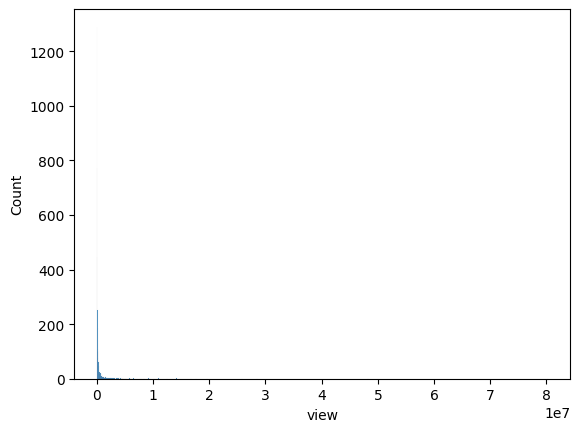

In [34]:
sns.histplot(data, x=data['view'])

The shape of view distribution indicates that this attribute has extreme values/outliers (anime with extreme high view). This is quite understandable. I'll check them all for more information.


In [35]:
show_summary(data['view'])

Mean:  380297.1498901099 
Median:  64050.5 
Mode:  31026 
Standard deviation:  1776779.681941226 
Quartile range: Q1: 25708.75    Q2: 64050.5    Q3: 232236.75


It can be observed that outliers of this attribute affect the mean and standard deviation. In this case, the median serves as a good measure of central tendency and quartile range is the same for dispersion.

Now, I will examine the outliers here and determine their origins. Afterward, I will remove them to observe the true distribution of view. Here, I am using the IQR method. Using IQR, outliers are values which are greater than Q3+1.5IQR or lower than Q1-1.5IQR with IQR = Q3-Q1.

In [36]:
show_outliers(data['view'])

[-284083.25, 542028.75]

In [37]:
pd.set_option('display.max_rows', None)
data[data['view'] > 542028.75]

,name,voting,duration,view,status,genre,director,country,follower,quality,rating,studio,season,year,type
2,Horimiya: Piece,0.91,13 tập,584019,Phim đang chiếu,"['Shounen', 'School', 'Romance', 'Slice of Lif...",Ishihama Masashi,Nhật Bản,497,HD,PG-13 - Teens 13 tuổi trở lên,CloverWorks,Mùa Hạ,2023,Anime bộ
4,Tôi Có Thực Sự Là Người Mạnh Nhất Không?,0.89,12 tập,555460,Phim đang chiếu,"['Shounen', 'Romance', 'Fantasy', 'Comedy', 'A...",Naoya Takashi,Nhật Bản,643,HD,PG-13 - Teens 13 tuổi trở lên,Staple Entertainment,Mùa Hạ,2023,Anime bộ
8,One Piece - Đảo Hải Tặc,0.91,chưa rõ,80263136,Phim đang chiếu,"['Shounen', 'Super Power', 'Fantasy', 'Drama',...",Uda Kounosuke,Nhật Bản,100095,FHD,PG-13 - Teens 13 tuổi trở lên,Toei Animation,Mùa Thu,1999,Anime bộ
9,Đấu Phá Thương Khung Phần 5,0.95,104 tập,3708499,Phim đang chiếu,"['Fantasy', 'Adventure', 'Action']",Đang cập nhật,Trung Quốc,4170,HD,PG-13 - Teens 13 tuổi trở lên,Motion Magic,Mùa Xuân,2022,Anime bộ
10,Kiếm Vực Phong Vân,0.83,92 tập,1087659,Phim đang chiếu,"['Fantasy', 'Adventure', 'Martial Arts', 'Acti...",Đang cập nhật,Trung Quốc,1323,HD,PG-13 - Teens 13 tuổi trở lên,Ruo Hong Culture,Mùa Thu,2021,Anime bộ
12,Võ Thần Chúa Tể,0.82,chưa rõ,5770204,Phim đang chiếu,"['Fantasy', 'Drama', 'Historical', 'Martial Ar...",Đang cập nhật,Trung Quốc,6098,HD,Đang cập nhật,Ruo Hong Culture,Mùa Thu,2020,Anime bộ
20,Sử Ma của Zero: Princesses no Rondo,0.93,12 tập,640282,Trọn bộ,"['School', 'Romance', 'Harem', 'Fantasy', 'Ecc...",Kou Yuu,Nhật Bản,1037,HD,PG-13 - Teens 13 tuổi trở lên,J.C.Staff,Mùa Xuân,2008,Anime bộ
27,Sát Thần,0.93,13 tập,643273,Trọn bộ,"['Romance', 'Harem', 'Fantasy', 'Ecchi', 'Come...",Đang cập nhật,Nhật Bản,1275,BD,PG-13 - Teens 13 tuổi trở lên,Diomedea,Mùa Hạ,2012,Anime bộ
42,Hội Pháp Sư,0.93,175 tập,4820234,Trọn bộ,"['Shounen', 'Fantasy', 'Comedy', 'Adventure', ...",Ochikoshi Tomonori,Nhật Bản,7205,HD,PG-13 - Teens 13 tuổi trở lên,"Satelight, A-1 Pictures",Mùa Thu,2009,Anime bộ
43,Hội Pháp Sư (2014),0.91,102 tập,2299857,Trọn bộ,"['Shounen', 'Fantasy', 'Comedy', 'Adventure', ...",Ishihira Shinji,Nhật Bản,3371,HD,PG-13 - Teens 13 tuổi trở lên,"A-1 Pictures, Bridge",Mùa Xuân,2014,Anime bộ


Based on a few records above, i formulated some **assumptions about anime with really high view counts:**

1. **Based on released year**, they are:
- Anime series have been in production for a long time and still releasing new episodes.
- Anime series which is hot recent years.
2. **Based on anime type**:
- Most of them are TV anime series, and for OVA/movie anime, they are all adaptations of popular anime series.

<Axes: xlabel='view', ylabel='Count'>

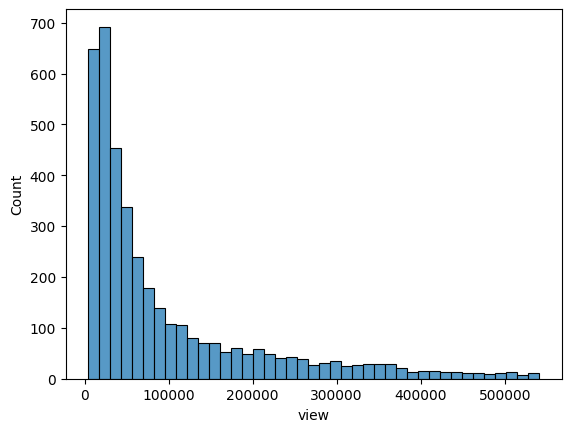

In [38]:
sns.histplot(data[data['view'] < 542028.75], x=data[data['view'] < 542028.75]['view'])

After excluding some outliers, we can see that view distribution is right-skew.

In [39]:
pd.set_option('display.max_rows', 10)

Now i'll find out the relationship between view and other attributes to know more about view source.

<ipython-input-40-5f3d477cd391>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


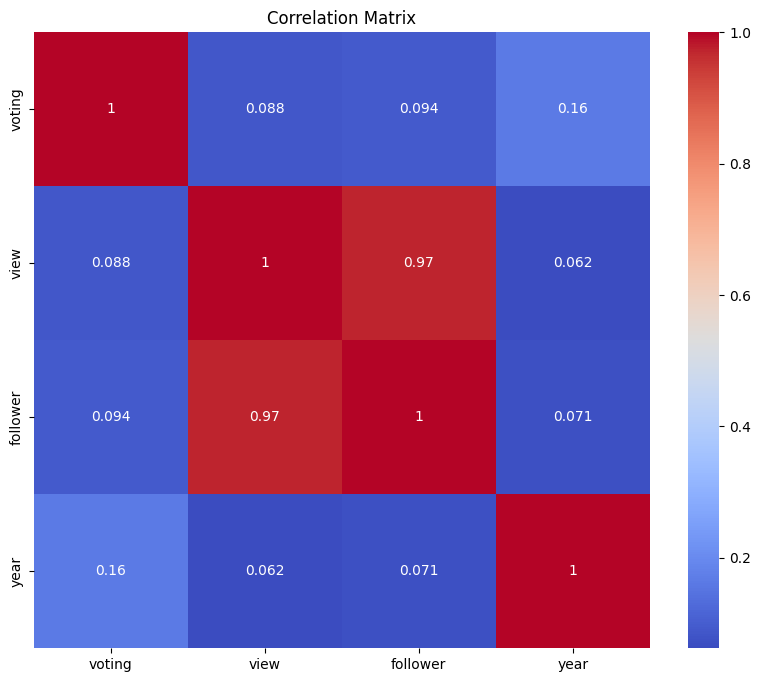

In [40]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

plt.show()

From correlation matrix, we can see that view and follower have a strong linear correlation (r = 0.97). This means that if follower increases, view will increase and vice versa.

Because analyzing view with related categorical attributes is relevant to trend analysis, I'll conduct this analysis in the following section.

#2. Trend analysis

First, i'll examine the genre trend based on view count.

In [41]:
view_by_genre = data.groupby('genre')['view'].sum()

top10_view_by_genre = view_by_genre.sort_values(ascending=False).head(10)

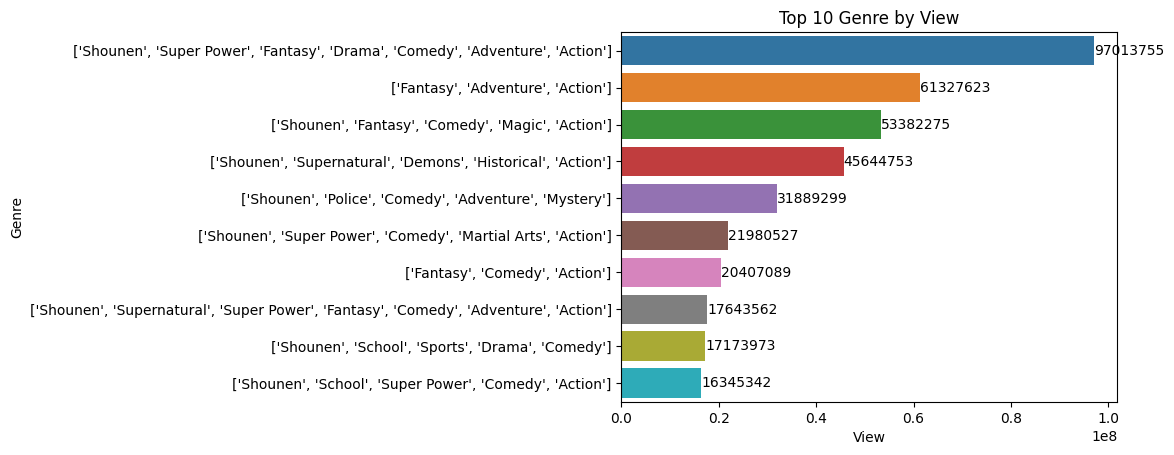

In [42]:
show_top10_barplot(top10_view_by_genre, 'View', 'Genre')

In fact, examining view by genre as mentioned above still has some ambiguity. This is because some movies have very high view, which can influence the genre they belong to. I will remove outliers to see which genres are genuinely the most viewed.

How about country and studio attributes?

In [43]:
view_by_genre = data[data['view'] < 542028.75].groupby('genre')['view'].sum()

top10_view_by_genre = view_by_genre.sort_values(ascending=False).head(10)

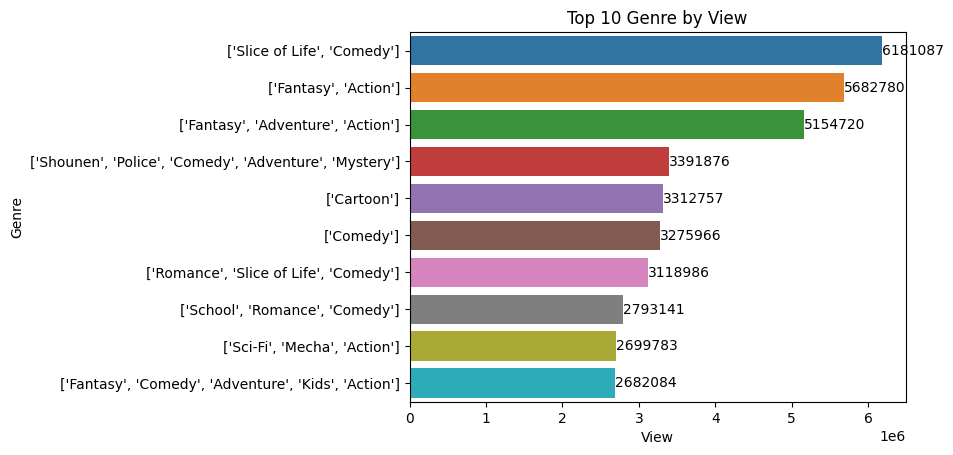

In [44]:
show_top10_barplot(top10_view_by_genre, 'View', 'Genre')

After removing the outliers based on view, we have the second bar plot. It's evident that slice of life, comedy, action and fantasty are the top genres that are streamed most. This is quite understandable. Comedy easily appeals to all age groups and is a highly entertaining genre. Both fantasy and action are captivating genres that can engage viewers for the long term, which is why they attract a substantial streaming audience. Slice of life is related to normal life which almost audiences can find them here.

In [47]:
view_by_studio = data[data['view'] < 542028.75].groupby('studio')['view'].sum()

top10_view_by_studio = view_by_studio.sort_values(ascending=False).head(10)

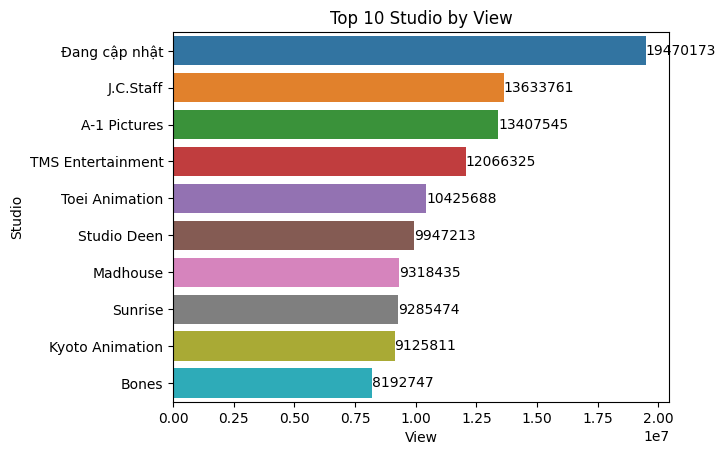

In [48]:
show_top10_barplot(top10_view_by_studio, 'View', 'Studio')

In [55]:
view_by_country = data[data['view'] < 542028.75].groupby('country')['view'].sum()

top10_view_by_country = view_by_country.sort_values(ascending=False)

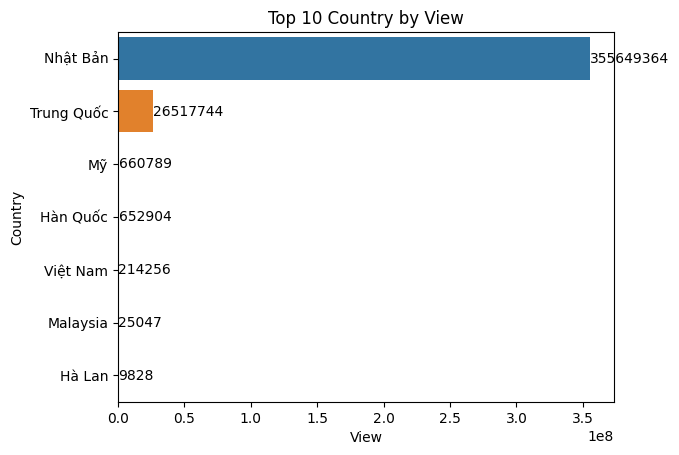

In [56]:
show_top10_barplot(top10_view_by_country, 'View', 'Country')

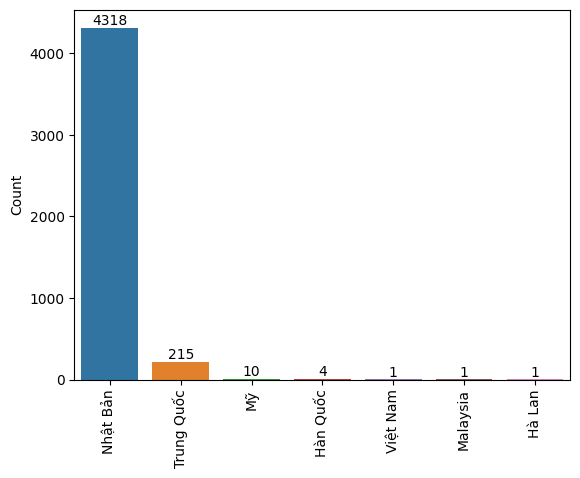

In [52]:
show_barplot(data['country'])

Almost studios with high view are from Japan. This is quite understandable. Japan is the birthplace of anime, and most of the current anime originates from Japan. However, currently, some countries have started producing their own animations, such as China, America.

There's one point that i have to pay attention on. Although the number of anime is extremely low, America, Korea and VietNam animes still have a considerable view. Vietnam's anime is also something I am paying attention to. I will see what kind of anime this is.

In [53]:
data[data['country'] == 'Việt Nam']

,name,voting,duration,view,status,genre,director,country,follower,quality,rating,studio,season,year,type
2544,AMV - ANIME MUSIC VIDEO,0.94,chưa rõ,214256,Phim đang chiếu,[],Đang cập nhật,Việt Nam,186,HD,G - Mọi lứa tuổi,Multi- Studio,Mùa Hạ,2019,Anime bộ


Different from my first thought, this is just a combination of anime ost. They may be produced by a Vietnamese individual. However, they can also be quite confusing.

In [59]:
view_by_director = data[data['view'] < 542028.75].groupby('director')['view'].sum()

top10_view_by_director = view_by_director.sort_values(ascending=False).head(10)

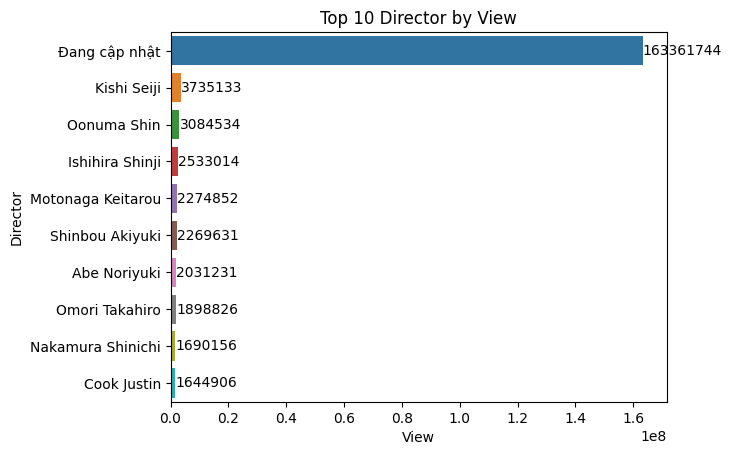

In [60]:
show_top10_barplot(top10_view_by_director, 'View', 'Director')

In [61]:
view_by_rating = data[data['view'] < 542028.75].groupby('rating')['view'].sum()

top10_view_by_rating = view_by_rating.sort_values(ascending=False).head(10)

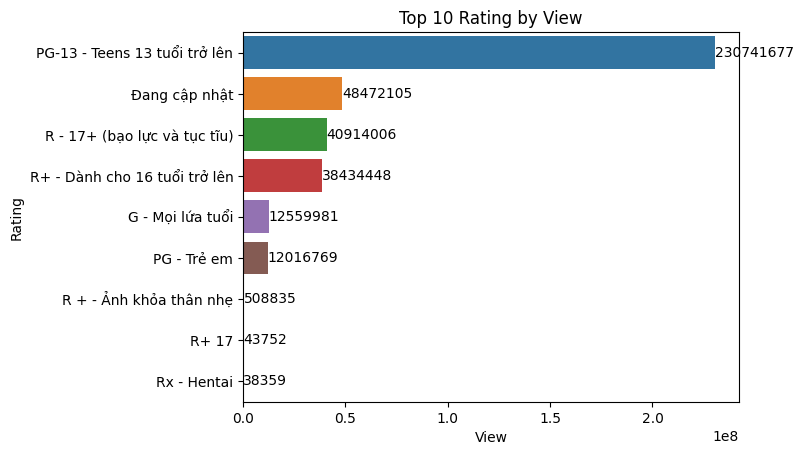

In [62]:
show_top10_barplot(top10_view_by_rating, 'View', 'Rating')

# 3. Voting analysis

<Axes: xlabel='voting', ylabel='Count'>

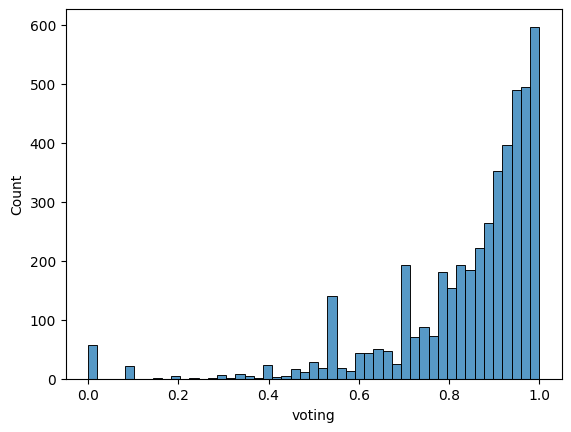

In [63]:
sns.histplot(data, x=data['voting'])

The distribution of voting is left-skew.


In [64]:
show_summary(data['voting'])

Mean:  0.8400989010989011 
Median:  0.9 
Mode:  1.0 
Standard deviation:  0.17477143664180325 
Quartile range: Q1: 0.78    Q2: 0.9    Q3: 0.95


We can notice that the voting is relatively high, even very high. 25% of the data is greater than 0.78 and 1 is the most frequent value for voting. Data doesn't disper too much, mainly concentrate around center. <br>
The question here is that: **Why the voting rate is so high on this anime streaming platform?**  

First of all, the voting mechanism of this website is relatively simple. Everyone who has an account (by signing up or using facebook/gmail account) can contribute to the total voting rate of every anime on this website. Voting rate is ranging from 1 to 10, by stars. <br>

Since I lack information about the user data, I am temporarily unable to provide the most accurate explanation for the underlying reasons. Below are some of my assumptions: <br>

1. This website displays the current voting ratio of anime on the rating bar. This influences the users to some extent as they are affected by the current rating value.
2. The popular anime genres are streamed most on this platform. As a result, the majority of the films align well with the viewers' preferences.

# 4. Find out the duration distribution of anime in different type.

Since there're two type of anime here (series and movie/ova), i'll analyze them seperately as duration format of each type is different from each other. Duration of anime series are caculated by the number of episode. Meanwhile anime movie/ova have duration caculated by both time (minutes) and episode.

### 3.1 Anime series

In [65]:
pd.set_option('display.max_rows', None)
data[data['type'] == 'Anime bộ']['duration'].value_counts()

12 tập      1344
13 tập       473
chưa rõ      176
24 tập       175
26 tập       174
25 tập       113
11 tập        84
10 tập        80
2 tập         75
6 tập         48
3 tập         46
4 tập         43
51 tập        30
50 tập        27
52 tập        26
16 tập        25
04 tập        24
06 tập        24
22 tập        23
03 tập        23
08 tập        23
02 tập        22
20 tập        21
14 tập        21
23 tập        16
15 tập        15
5 tập         13
39 tập        13
05 tập        11
8 tập         11
7 tập         10
07 tập        10
49 tập         9
09 tập         9
60 tập         9
9 tập          9
48 tập         8
21 tập         7
01 tập         7
40 tập         6
43 tập         6
38 tập         5
45 tập         5
18 tập         5
47 tập         4
27 tập         4
75 tập         4
17 tập         4
23 phút        4
25 phút        4
24 phút        4
35 tập         3
64 tập         3
97 tập         3
30 tập         3
92 tập         3
34 tập         3
37 tập         3
104 tập       

In the anime series type, there are some anime that have their duration measured in minutes. I will convert these values into episode quantifications (1 episode). Additionally, episodes with leading zeros will be stripped.

In [66]:
data.loc[(data['type'] == 'Anime bộ') & (data['duration'].str.contains('phút')), 'duration'] = '1 tập'

In [67]:
data['duration'] = data['duration'].str.replace(r'^0', '', 1)

<ipython-input-67-7089225373d6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['duration'] = data['duration'].str.replace(r'^0', '', 1)


Now i'll create another dataframe to see the duration distribution of anime series as i don't want to change the original data. I also drop some records with duration 'unknown'.

In [68]:
anime_series = data[data['type'] == 'Anime bộ'].copy()
anime_series = anime_series.drop(anime_series[anime_series['duration'] == 'chưa rõ'].index)
anime_series['duration'] = anime_series['duration'].str.replace(' tập','').astype(int)

In [69]:
show_summary(anime_series['duration'])

Mean:  17.911050394656954 
Median:  12.0 
Mode:  12 
Standard deviation:  23.889276283258955 
Quartile range: Q1: 12.0    Q2: 12.0    Q3: 16.0


<Axes: xlabel='duration', ylabel='Count'>

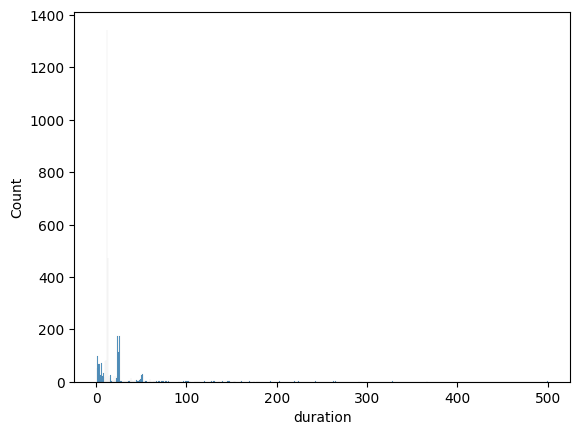

In [70]:
sns.histplot(data=anime_series, x='duration')

From the summary above, it's evident that almost anime series have 12 episodes. Although there're some animes with relatively high episode (100-500), the number of lower episode is much more. Therefore mean and standard deviation don't skew too much.

### 3.2 Anime movie/ova

In [71]:
data[data['type'] == 'Anime lẻ']['duration'].value_counts()

24 phút        64
23 phút        51
1 tập          35
25 phút        29
100 phút       28
2 tập          27
90 phút        26
95 phút        24
30 phút        22
26 phút        21
98 phút        20
110 phút       18
27 phút        16
93 phút        15
3 tập          15
105 phút       15
102 phút       15
28 phút        14
chưa rõ        14
99 phút        13
106 phút       13
94 phút        13
10 phút        12
89 phút        11
92 phút        11
80 phút        11
115 phút       11
59 phút        11
120 phút       11
87 phút        10
48 phút        10
97 phút        10
108 phút       10
11 phút         9
117 phút        9
70 phút         9
91 phút         9
96 phút         9
71 phút         9
103 phút        9
101 phút        9
111 phút        8
114 phút        8
55 phút         8
109 phút        8
104 phút        8
16 phút         7
116 phút        7
21 phút         7
52 phút         7
50 phút         7
119 phút        7
107 phút        6
6 tập           6
49 phút         6
45 phút   

Anime movies/OVAs are also mixed between episodes and duration time. I will separate them for the purpose of examining the distribution of duration time for each individual movie. Although they fall under the category of single-anime, anime movies can have multiple episodes. These episodes might not necessarily be part of the main storyline, they could be related to character side stories, for example.

In [72]:
anime_movie = data[(data['type'] == 'Anime lẻ') & (data['duration'].str.contains('phút'))].copy()
anime_movie['duration'] = anime_movie['duration'].str.replace(' phút','').astype(float)

In [73]:
show_summary(anime_movie['duration'])

Mean:  66.25503642039543 
Median:  73.0 
Mode:  24.0 
Standard deviation:  37.79792117332266 
Quartile range: Q1: 25.0    Q2: 73.0    Q3: 100.0


<Axes: xlabel='duration', ylabel='Count'>

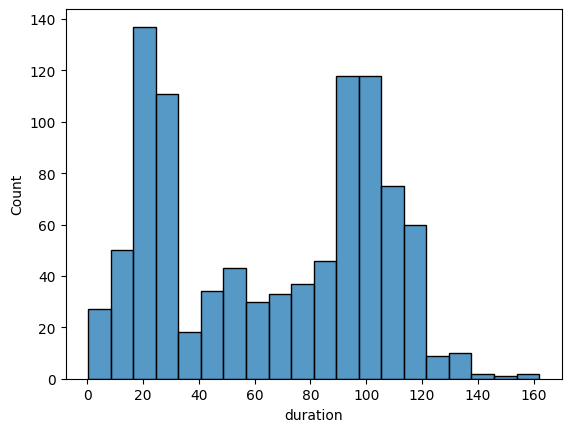

In [74]:
sns.histplot(data=anime_movie, x='duration', bins=20)

Duration histogram of anime movie/ova has 2 peaks. It's mean that there're 2 popular duration in this type of anime (about 15-30 and 90-110). Data doesn't disper too much.

# 5. Exploring other categorical data

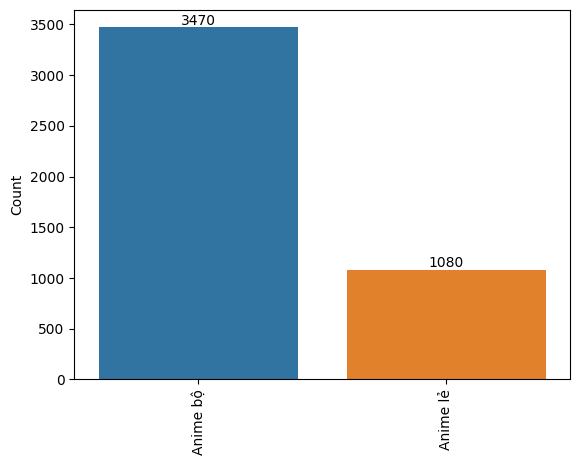

In [75]:
show_barplot(data['type'])

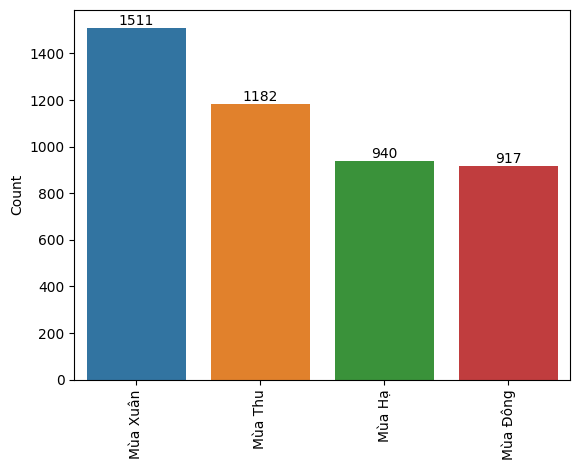

In [76]:
show_barplot(data['season'])

In [77]:
data['quality'].value_counts()

HD                3888
BD                 277
SD                 205
FHD                116
BD/Bluray           33
HQ                  22
Full HD              2
None                 1
Bluray Disc          1
rHD                  1
CAM HD               1
BD Vietsub           1
OVA BD Vietsub       1
480P                 1
Name: quality, dtype: int64

I will change some values to classify them correctly.

In [78]:
data['quality'] = data['quality'].str.replace('Full HD', 'HD')
data['quality'] = data['quality'].str.replace('BD Vietsub', 'BD')
data['quality'] = data['quality'].str.replace('OVA BD Vietsub', 'BD')
data['quality'] = data['quality'].str.replace('OVA BD', 'BD')

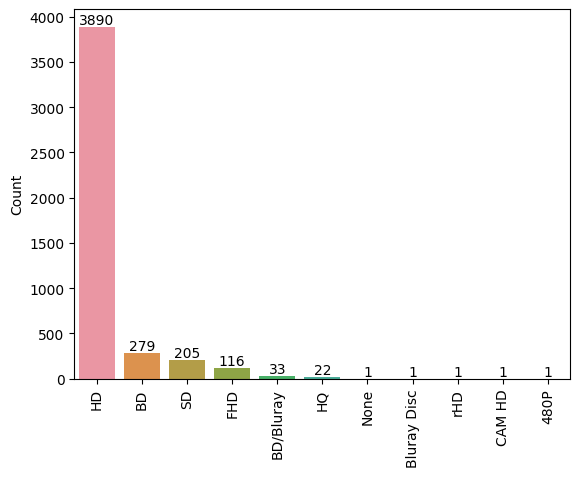

In [79]:
show_barplot(data['quality'])

In [80]:
contingency_table = pd.crosstab(data['season'], data['country'])
print(contingency_table)

country   Hà Lan  Hàn Quốc  Malaysia  Mỹ  Nhật Bản  Trung Quốc  Việt Nam
season                                                                  
Mùa Hạ         0         0         1   0       903          35         1
Mùa Thu        0         1         0   2      1135          44         0
Mùa Xuân       1         2         0   4      1396         108         0
Mùa Đông       0         1         0   4       884          28         0


# 6. Exploring the number of anime through years

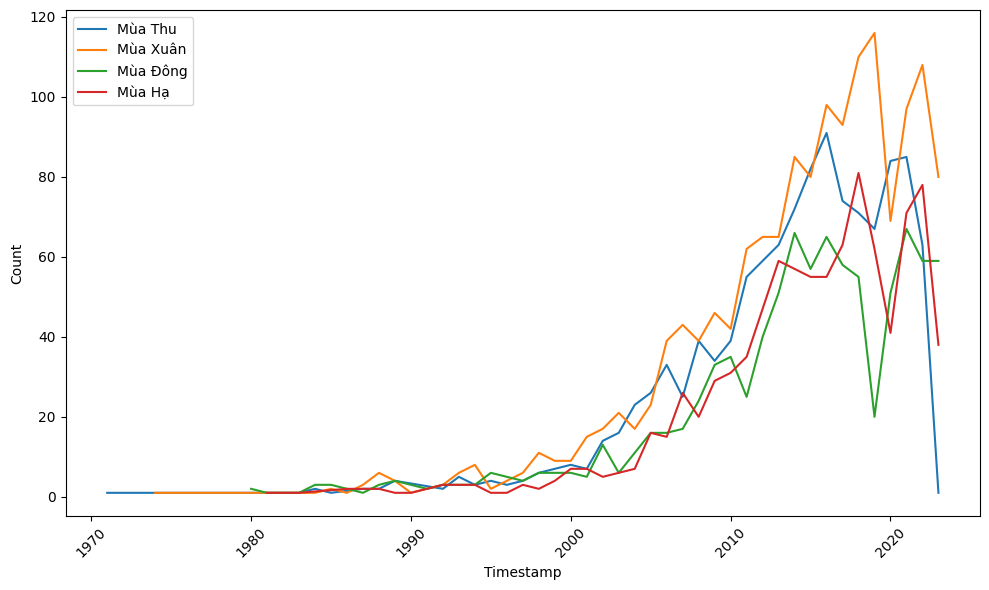

In [81]:
count_data = data.groupby(['year', 'season']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Count', hue='season', data=count_data)

plt.xlabel("Timestamp")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()

plt.show()